<h2>Name : Nripesh Kumar

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading the csv file and printing top 4 values using head()

In [2]:
df = pd.read_csv('carprices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [3]:
df.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000


Checking rows and columns in carprices dataset

In [4]:
df.shape

(20, 3)

Checking correlation between variables

In [5]:
df.corr()

,Mileage,Age(yrs),Sell Price($)
Mileage,1.000000,0.968290,-0.967173
Age(yrs),0.968290,1.000000,-0.941522
Sell Price($),-0.967173,-0.941522,1.000000


With above correlation we can infer that Mileage sell price strongly depends on Mileage and Age

In [6]:
import seaborn as sns

Using a heatmap to view correlation

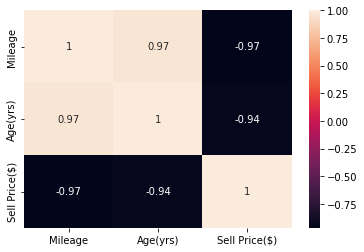

In [7]:
sns.heatmap(df.corr(), annot = True)

Storing independent variables in x and dependent variable in y

In [8]:
x = df[['Age(yrs)','Mileage']]
y = df['Sell Price($)']

Plotting a boxplot to check if any outliers are present or not

D:\softwares\python 3.7.5\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\softwares\python 3.7.5\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


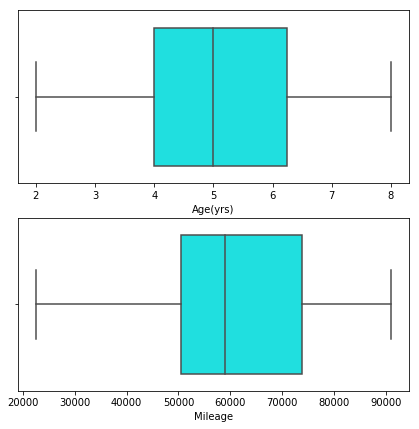

In [9]:
fig, axs = plt.subplots(2, figsize = (7,7))
j=0
for i in x:
    sns.boxplot(df[i],color='cyan', ax=axs[j])
    j+=1


Using scatterplot to check linearity of data

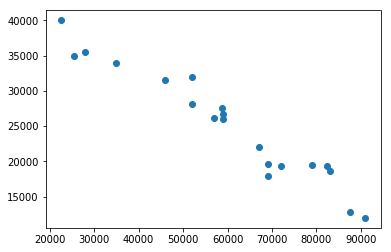

In [10]:
plt.scatter(df['Mileage'], df['Sell Price($)'])

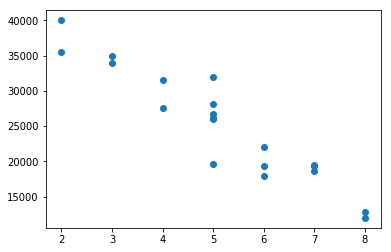

In [11]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])

In [12]:
x.shape

(20, 2)

In [13]:
y.shape 

(20,)

In [14]:
from sklearn.model_selection import train_test_split

Splitting training and testing data, keeping training data as 75% of all data

In [15]:
XTrain, XTest, YTrain, YTest = train_test_split(x,y,test_size=0.25, random_state=3)

In [16]:
XTrain.shape

(15, 2)

In [17]:
from sklearn.linear_model import LinearRegression

Performing linear regression

In [18]:
lr = LinearRegression()

fitting training dataset on regression model

In [19]:
lr.fit(XTrain, YTrain)

LinearRegression()

Predicting output of testing data

In [20]:
predY = lr.predict(XTest)
predY

array([16815.54595163, 26111.11663946, 34436.28143341, 22735.7917912 ,
       30273.69903643])

Checking accuracy score of created model

In [21]:
lr.score(XTest, YTest)

0.9008538675529387

plotting predicted and actual value againt age(x-axis) and sales(y-axis)<br>
Blue   - Actual values<br>
Orange - predicted values

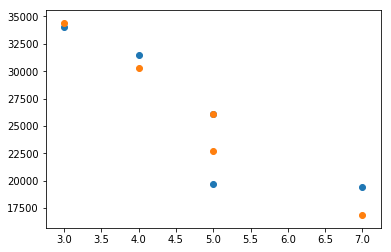

In [22]:
plt.scatter(XTest['Age(yrs)'], YTest)
plt.scatter(XTest['Age(yrs)'], predY)

plotting predicted and actual value againt age(x-axis) and sales(y-axis)<br>
Blue   - Actual values<br>
Orange - predicted values

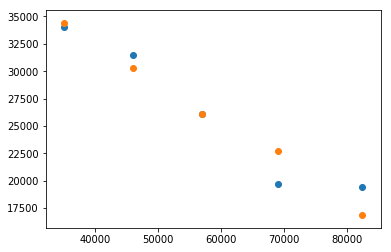

In [23]:
fig, ax = plt.subplots()
plt.scatter(XTest['Mileage'], YTest)
plt.scatter(XTest['Mileage'], predY)


D:\softwares\python 3.7.5\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\softwares\python 3.7.5\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\softwares\python 3.7.5\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


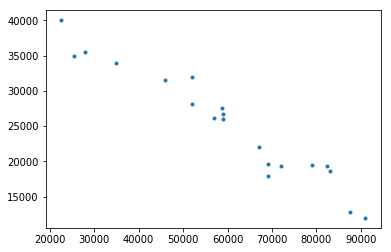

In [28]:
plt.plot(x['Mileage'],y,'.')

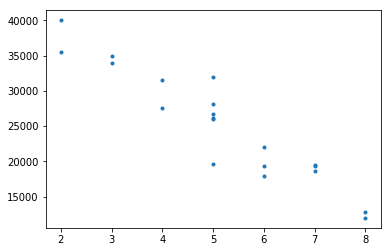

In [29]:
plt.plot(x['Age(yrs)'],y,'.')

In [39]:
def fit_poly(degree):
    plt.clf()
    p = np.polyfit( x['Mileage'], y, deg = degree )
    x['fit'] = np.polyval( p, x['Mileage'] )
    sns.regplot( x['Mileage'], y, fit_reg = False )
    return plt.plot( x['Mileage'], x['fit'], label='fit' )

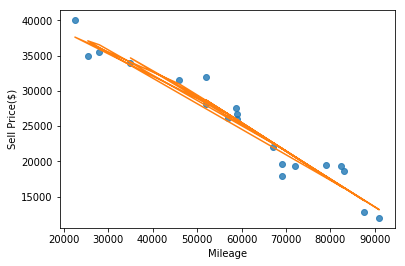

In [47]:
fit_poly(4)

In [48]:
from sklearn import metrics

In [49]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

In [51]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1, 15 ):
    p = np.polyfit( XTrain['Mileage'], YTrain, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( YTrain, np.polyval( p, XTrain['Mileage'] ) ),
                      get_rmse( YTest, np.polyval( p, XTest['Mileage'] ) ) ]

D:\softwares\python 3.7.5\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\softwares\python 3.7.5\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,2041.200560,1.618858e+03
1,2.0,1907.637224,1.848297e+03
2,3.0,1892.600594,1.874041e+03
3,4.0,1886.286179,1.927031e+03
4,5.0,1362.112711,1.315762e+03
5,6.0,1355.432325,1.548597e+03
6,7.0,1311.150971,1.759055e+03
7,8.0,929.055880,1.413756e+03
8,9.0,917.681667,2.641184e+03
9,10.0,914.978395,7.635195e+03


D:\softwares\python 3.7.5\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\softwares\python 3.7.5\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\softwares\python 3.7.5\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


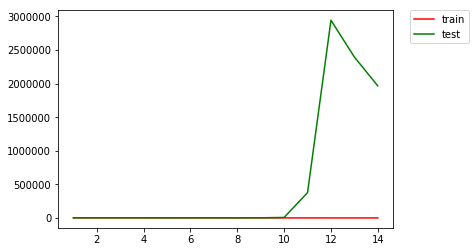

In [53]:
plt.plot( rmse_df.degree, rmse_df.rmse_train, label='train', color = 'r' )

plt.plot( rmse_df.degree, rmse_df.rmse_test, label='test', color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
